# 一、线性回归手动实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 用来加载中文
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

## 数据加载

In [2]:
def loadDataSet(filename):
    '''加载文件，将feature存在X中，y存在Y中'''
    X = []
    Y = []
    with open(filename, 'rb') as f:
        for idx, line in enumerate(f):
            line = line.decode('utf-8').strip()
            if not line:
                continue
                
            eles = line.split()
            if idx == 0:
                numFeature = len(eles)
            
            eles = list(map(float, eles)) # 将数据转换成 float 型
            
            X.append(eles[:-1])   # 除最后一列外都是 feature，append(list)
            Y.append(eles[-1:])    # 最后一列是实际值,同上
            
        return np.array(X), np.array(Y)   # 将X,Y列表转化成矩阵

In [3]:
X, Y = loadDataSet('./TestData/motor.txt')
# print(X.shape)
# print(Y.shape)
n_sample = X.shape[0]
n_feature = X.shape[1]
# print(n_sample, n_feature)

## 模型定义

设$X$的维度为$(n\_sample,n\_feature)$，设$W$的维度为$(n\_feature,n\_output)$，偏置系数$b$为单变量系数。模型可以写成：
$$
\hat{Y}=XW+b
$$

In [4]:
W = np.random.randn(n_feature).reshape((n_feature, 1))  # 随机设置初始权重，列向量
b = 1  # 偏置

Y_hat = np.dot(X, W)+b

# print(W.shape,Y_hat.shape)

模型的损失函数为：
$$
\begin{align}
L&=\frac{1}{2n} \sum\limits_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^{2} \\
&=\frac{1}{2n}(Y-\hat{Y})^{T}(Y-\hat{Y}) \\
\end{align}
$$
损失函数关于参数$W$与$b$的梯度可以求得：
$$
\begin{align}
\frac{\partial{L}}{\partial{W}}&=\frac{1}{n}[X^{T}(\hat{Y}-Y)] \\
\frac{\partial{L}}{\partial{b}}&=\frac{1}{n}[1,1,...,1]{\cdot}(\hat{Y}-Y) \\
\end{align}
$$

In [5]:
cost = 1 / (2 * n_sample) * ((Y_hat - Y).T.dot(Y_hat - Y))

dW = X.T.dot(Y_hat - Y) / n_sample
db = np.sum(Y_hat - Y)/ n_sample

参数的迭代更新公式：
$$
W:=W-{\alpha}\frac{\partial{L}}{\partial{W}}, \quad b:b-{\alpha}\frac{\partial{L}}{\partial{b}}
$$

## 梯度更新

将上面的内容整合起来如下：

In [6]:
max_iter=2000
alpha=0.000001        # 注意学习率过大会导致震荡，然后误差越来越大

def linear_reg(X,Y,alpha=0.000001,max_iter=2000):
    epsilon = 0.00001     # 阈值
    converged = False    # 标记是否收敛
    costs = [0]           # 记录每一次迭代的 loss，初始化为 0
    
    n_sample=X.shape[0]
    n_feature=X.shape[1]
    
    W = np.random.randn(n_feature).reshape((n_feature,1))  # 权重
    b = 1  # 偏置

    for i in range(max_iter):
        if converged :
            break

        Y_hat = np.dot(X, W)+b

        # 计算损失
        cost = 1 / (2 * n_sample) * ((Y_hat - Y).T.dot(Y_hat - Y))
        costs.append(cost)
        if abs(costs[-1] - costs[-2]) < epsilon:
            converged = True
            break

        # 更新梯度
        dW = X.T.dot(Y_hat - Y) / n_sample
        db = np.sum(Y_hat - Y)/ n_sample
        W = W - alpha * dW
        b = b - alpha * db
    
    return W,b

## 开始训练

为了使模型更快的收敛，这里对 X 进行标准化：
$$
x=\frac{x-x_{\mu}}{\sigma}
$$

In [7]:
X_avg = X.mean(axis=0)
X_std = X.std(axis=0)

X_Stand = (X-X_avg) / X_std
# print(X_Stand.shape)

In [8]:
W,b=linear_reg(X_Stand,Y)      
print(W,b)

[[ 1.69507083]
 [-1.05160871]
 [ 0.41368493]
 [ 1.60808516]
 [ 0.1753086 ]
 [ 1.00720868]
 [-0.67075356]
 [-1.31054567]
 [ 1.14587739]
 [ 2.17444392]
 [-0.09255882]] 0.9980854774058401


## 使用模型预测

In [9]:
Y_pred_train = np.dot(X, W) + b
#print(Y_pred_train)

# 二、构造对比数据

### ① 加载fate 预测结果:

In [10]:
def loadCompareDataSet(filename):
   
    Y_com = []
    with open(filename, 'rb') as f:
        for idx, line in enumerate(f):
            line = line.decode('utf-8').strip()
            if not line:
                continue
                
            eles = line.split()
            if idx == 0:
                numFeature = len(eles)
            
            eles = list(map(float, eles)) # 将数据转换成 float 型
            
            Y_com.append(eles[2:3])    # 应该取第三列的数据
            
        return np.array(Y_com)

Y_com = loadCompareDataSet('./TestData/Predict_campare_motor.txt')
# print(Y_com)

### ② 利用 scikit 工具预测：

In [11]:
from sklearn.linear_model import LinearRegression

# 开始训练
reg = LinearRegression().fit(X_Stand,Y)

# 开始预测
Y_pred_skl = reg.predict(X)

# 三、简单评测

使用 RMSE 损失函数简单评价：
$$
\frac{1}{2n} \sqrt{\sum_{i=1}^n (Y_{true} - Y_{predict})^2}
$$

In [12]:
def RMSE(Y_true,Y_pred):
    return np.sum((Y_true-Y_pred)**2)**0.5/len(Y_true)

print("本例预测的 RMSE 值为：",RMSE(Y, Y_pred_train))
print("fate 预测的 RMSE 值为：",RMSE(Y, Y_com))
print("scikit 工具预测的 RMSE 值为：",RMSE(Y, Y_pred_skl))

本例预测的 RMSE 值为： 0.1468385445122789
fate 预测的 RMSE 值为： 0.010437055868305935
scikit 工具预测的 RMSE 值为： 0.009954971069721368


# 四、结果的图形化展示

In [13]:
# 对 Y，Y_pred_train，Y_com 排序
sorted_Y = Y[np.argsort(Y[:,0])]
sorted_Y_pred_train = Y_pred_train[np.argsort(Y_pred_train[:,0])]
sorted_Y_com = Y_com[np.argsort(Y_com[:,0])]
sorted_Y_pred_skl = Y_pred_skl[np.argsort(Y_pred_skl[:,0])]

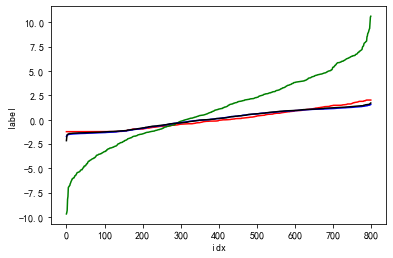

In [15]:
#添加X/Y轴描述
plt.xlabel('idx')
plt.ylabel('label')

# 给定的 label 值
plt.plot(range(len(sorted_Y)), sorted_Y, color='red')

# 这里手动预测的 label 值
plt.plot(range(len(sorted_Y_pred_train)), sorted_Y_pred_train, color='green')

# fate 预测的 label 值
plt.plot(range(len(sorted_Y_com)), sorted_Y_com, color='blue')

# 利用 scikit 工具预测的 label 值
plt.plot(range(len(sorted_Y_pred_skl)), sorted_Y_pred_skl, color='black')

直方图分布：

① 给定的 Y 分布：

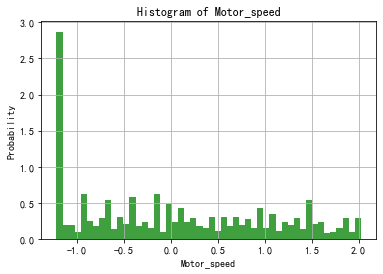

In [40]:
n, bins, patches = plt.hist(Y, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Motor_speed')
plt.ylabel('Probability')
plt.title('Histogram of Motor_speed')
plt.grid(True)
plt.show()

② 手动预测的 Y 分布：

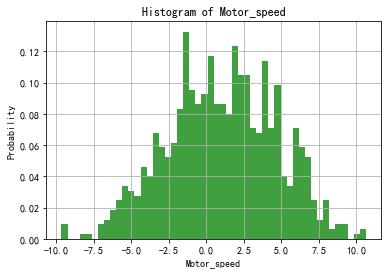

In [43]:
n, bins, patches = plt.hist(Y_pred_train, 50, density=True, facecolor='g', alpha=0.75)
# n, bins, patches = plt.hist(Y_com, 50, density=True, facecolor='b', alpha=0.75)
# n, bins, patches = plt.hist(Y_pred_skl, 50, density=True, facecolor='y', alpha=0.75)

plt.xlabel('Motor_speed')
plt.ylabel('Probability')
plt.title('Histogram of Motor_speed')
plt.grid(True)
plt.show()

③ fate 预测的 Y 分布：

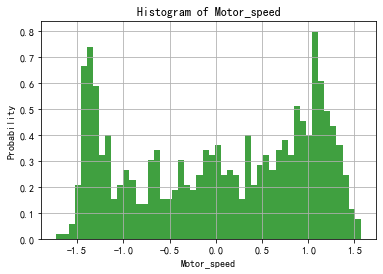

In [22]:
n, bins, patches = plt.hist(Y_com, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Motor_speed')
plt.ylabel('Probability')
plt.title('Histogram of Motor_speed')
plt.grid(True)
plt.show()

④ 利用 scikit 预测的 Y 分布：

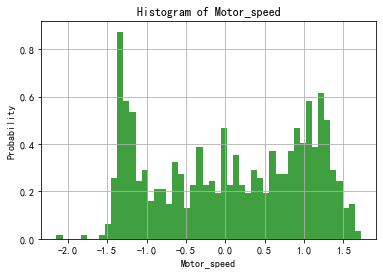

In [26]:
n, bins, patches = plt.hist(Y_pred_skl, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Motor_speed')
plt.ylabel('Probability')
plt.title('Histogram of Motor_speed')
plt.grid(True)
plt.show()

# 五、结果分析

本例中手动实现的线性回归，会受到初始 W 值的影响，导致最终训练效果的不同。由结果分析，单纯的一元一次线性回归可能不满足要求，我们需要扩展到多项式回归问题，来实现更好的拟合。